In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

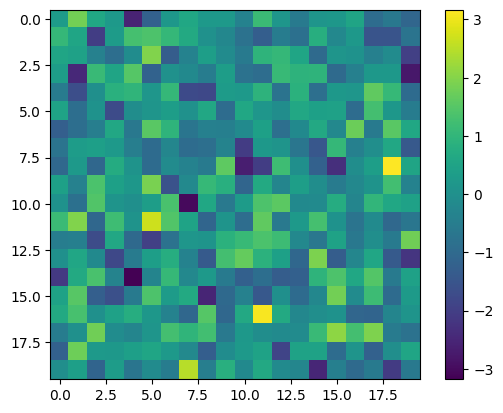

In [5]:
w = torch.randn(20, 20).to(device)
# model.to(device)
plt.imshow(w.cpu())
plt.colorbar()

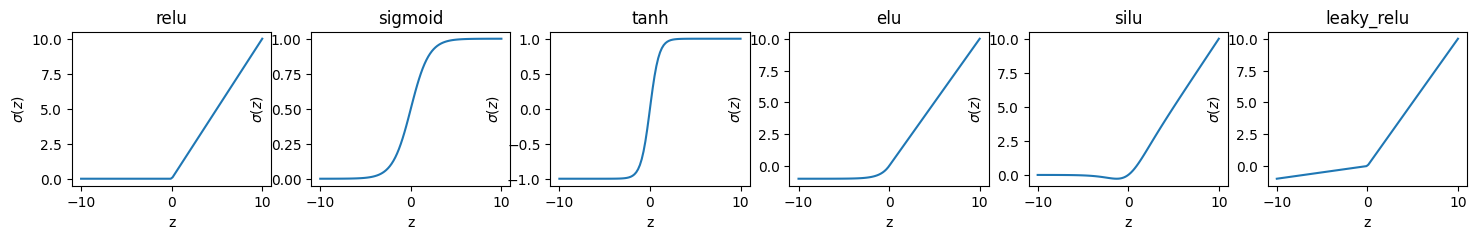

In [6]:
z = torch.linspace(-10, 10, 100)

activations = {'relu':torch.nn.ReLU(), 
               'sigmoid':torch.nn.Sigmoid(), 
               'tanh':torch.nn.Tanh(), 
               'elu':torch.nn.ELU(),
               'silu':torch.nn.SiLU(),
               'leaky_relu':torch.nn.LeakyReLU(0.1)}

n = len(activations)
i = 1
fig = plt.figure(figsize=(18, 2))
for name, act in activations.items():
    ax = fig.add_subplot(1, n, i)
    h = act(z)
    ax.plot(z, h)
    i += 1
    
    ax.set_xlabel("z")
    ax.set_ylabel(r"$\sigma(z)$")
    ax.set_title(name)

In [9]:
x = torch.tensor([1., 2., 3., 4.], requires_grad=True)
y = torch.sum(x**2)

y.backward()
print(x.grad)

tensor([2., 4., 6., 8.])


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

w = torch.randn(3, 3, device=device, requires_grad=True)
print("w:", w)

device: cuda
w: tensor([[-1.2046,  0.6230, -0.6130],
        [-0.8220,  1.0516, -0.3988],
        [ 0.2476,  1.0646, -0.2462]], device='cuda:0', requires_grad=True)


relu
sigmoid
tanh
elu


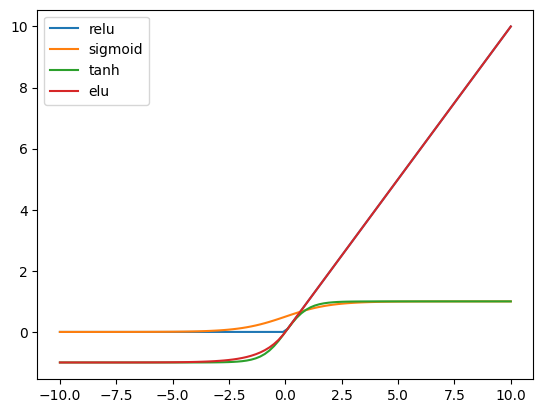

In [6]:
activations = {"relu":torch.nn.ReLU(), "sigmoid":torch.nn.Sigmoid(), "tanh":torch.nn.Tanh(), "elu":torch.nn.ELU()}

for name, act in activations.items():
    print(name)
    x = torch.linspace(-10, 10, 100)
    plt.plot(x, act(x), label=name)
plt.legend()

In [7]:
one_layer = nn.Linear(in_features=3, out_features=4)

In [8]:
x = torch.randn(3)
y = one_layer(x)

In [11]:
nn.ReLU()(y)

tensor([0.3341, 0.0000, 0.2136, 0.0000], grad_fn=<ReluBackward0>)

In [12]:
y

tensor([ 0.3341, -0.3331,  0.2136, -0.5146], grad_fn=<ViewBackward0>)

In [13]:
x

tensor([-0.9312, -0.2840, -0.6033])

In [17]:
mlp = nn.Sequential(
    nn.Linear(3, 4), 
    nn.ReLU(),
    nn.Linear(4, 1)
)

In [18]:
y = mlp(x)

In [19]:
y

tensor([-0.4290], grad_fn=<ViewBackward0>)

In [28]:
x = torch.randn(10, 1, 28, 28)

conv = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=7744, out_features=5)
)

In [29]:
y = conv(x)

In [31]:
y.shape

torch.Size([10, 5])

In [ ]:
import torch

x = torch.tensor([1., 2., 3.], device="cuda", requires_grad=True)
z = torch.sum(x ** 3 + x ** 2 + 1)

dzdx = torch.autograd.grad(z, x, create_graph=True)
d2zdx2 = torch.autograd.grad(dzdx, x, create_graph=True, grad_outputs=torch.ones_like(x))


In [1]:
import torch
import matplotlib.pyplot as plt

def fa(x):
    return torch.exp(-0.2 * x) * torch.sin(x)

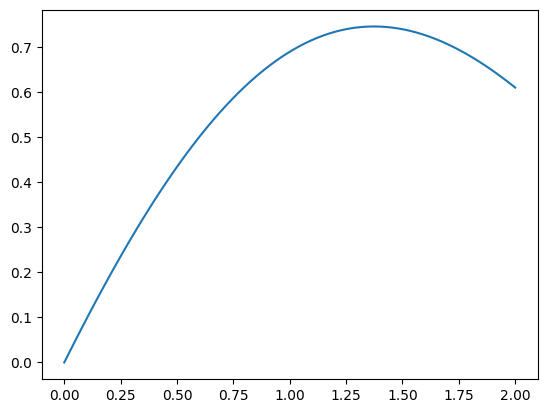

In [2]:
x = torch.linspace(0, 2, 100)
plt.plot(x, fa(x))

In [3]:
yi = []
fi = 0.0
for i in range(100):
    yi.append(fi)
    fi = fi + (x[1] - x[0]) * (torch.exp(-0.2 * x[i]) * torch.cos(x[i]) - 0.2 * fi)


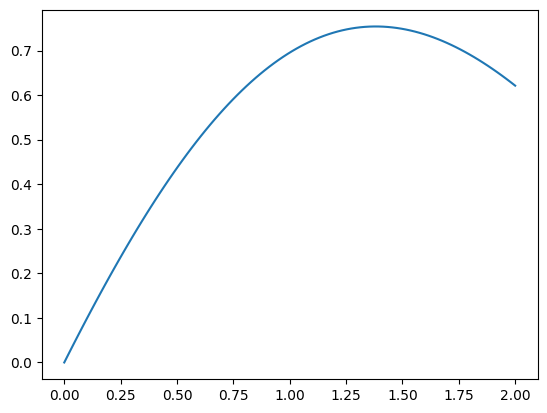

In [4]:
plt.plot(x, yi)

In [5]:
from scipy.integrate import odeint
import numpy as np
def f(y, x):
    return np.exp(-0.2 * x) * np.cos(x) + np.cos(x) - 0.2 * y

ynum = odeint(f, 0.0, x)

In [6]:
ynum

array([[0.        ],
       [0.04027907],
       [0.0802982 ],
       [0.12004246],
       [0.15949709],
       [0.19864752],
       [0.23747935],
       [0.27597834],
       [0.31413052],
       [0.35192203],
       [0.38933921],
       [0.4263687 ],
       [0.46299725],
       [0.49921183],
       [0.53499968],
       [0.57034828],
       [0.60524519],
       [0.63967835],
       [0.67363592],
       [0.70710617],
       [0.74007773],
       [0.77253951],
       [0.80448048],
       [0.83589004],
       [0.86675782],
       [0.89707352],
       [0.92682744],
       [0.95600985],
       [0.9846113 ],
       [1.01262285],
       [1.0400356 ],
       [1.0668409 ],
       [1.09303064],
       [1.11859671],
       [1.14353134],
       [1.1678272 ],
       [1.19147708],
       [1.21447401],
       [1.23681155],
       [1.25848331],
       [1.27948322],
       [1.29980568],
       [1.31944517],
       [1.33839652],
       [1.35665496],
       [1.3742159 ],
       [1.39107501],
       [1.407

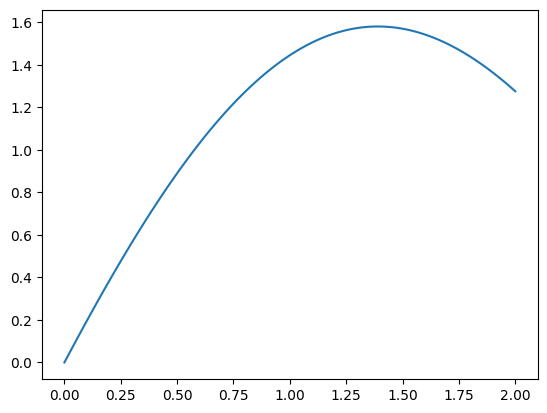

In [7]:
plt.plot(x, ynum)